# PRINCIPAL COMPONENT ANALYSIS (PCA)

[Minimal Approach](#minimal_approach)

[Importing & Exploring Dataset](#importing_dataset)

[Plotting Data(Visualization)](#plotting_data)

[Data to Dataframe conversion](#conv_df)

[Scaling the Data](#scaling)

[Train test split & Logistic Regression before PCA](#logreg_bef)

[Logistic Regression after PCA](#logreg_after)

<a id='minimal_approach'></a>

# Minimal Approach

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

In [2]:
digits2 = load_digits()
dig_data = digits2.data
print(dig_data.shape)

(1797, 64)


In [3]:
pca2 = PCA(0.95).fit_transform(dig_data)

print(pca2.shape)

(1797, 29)


## Here we could see that,  64 colums has been reduced to 29 colums

# -------------------------------------------------------------------------------------------------------------- 

<a id='importing_dataset'></a>

# Importing & Exploring Dataset

In [4]:
from sklearn.datasets import load_digits

In [5]:
digits = load_digits()

In [6]:
digits.keys() # shows available keys

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [7]:
digits.data.shape # shape of original dataset

# 1797 samples and each has 64 columns of features

(1797, 64)

### Here the number of columns is 64, note it

<a id='plotting_data'></a>

# Plotting a data from Dataset

In [8]:
digits.data[0] # showing raw form of a single data

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
# reshaping above 1D array to 2D array of 8 rows & 8 columns
digits.data[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Actual value:  0


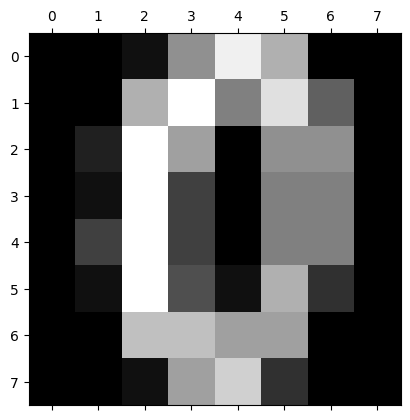

In [10]:
import matplotlib.pyplot as plt
plt.matshow(digits.data[10].reshape(8, 8)) # plotting the reshaped image matrix
plt.gray() # grayscaling the plot
print("Actual value: ", digits.target[10]) # showing the real value corresponds to the plot

<a id='conv_df'></a>

# Data to Dataframe conversion

In [11]:
import pandas as pd
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
df.head(3) # showing some data as dataframe

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [12]:
df.describe() # overview of statistical analysis of the data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


### we could clearly see that column 'pixel_0_0' doesn't give any relevant information as it has no good values for min & max, but column like 'pixel_0_5' has some good information (look min & max values)

In [13]:
X = df
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

<a id='scaling'></a>

# Scaling the Data

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # scaling values, or fixing values b/w [-1,1]
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

<a id='logreg_bef'></a>

# Train test split & Logistic Regression
## For checking Accuracy before applying PCA 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

In [27]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)
print("Variance BEFORE PCA:", logreg.score(X_test, y_test))

Variance BEFORE PCA: 0.975


In [28]:
from sklearn.decomposition import PCA
pca = PCA(0.95) 
X_pca = pca.fit_transform(X)# asking PCA to retain 95% of useful features, and fitting PCA on our dataframe variable i.e X
X_pca.shape

(1797, 29)

### Here the number of columns has been reduced to is 29. We have reduced 35 columns, i.e 35 useless features has been reduced

In [29]:
# percentage of useful info is provided by each compnonet
# i.e first component produces 14% of useful info
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [30]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=123)

<a id='logreg_after'></a>

# Logistic Regression after PCA

In [31]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000).fit(X_train_pca, y_train)
print("Variance AFTER PCA:", logreg.score(X_test_pca, y_test))

Variance AFTER PCA: 0.9666666666666667
